In [ ]:
!pip install pytorch==0.4.0 torchvision==0.2.1 numpy==1.12.1

In [ ]:
import torch
import torchvision

from torchvision import datasets, transforms

import helper

print(f"Pytorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
      
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

Here we can see one of the images.

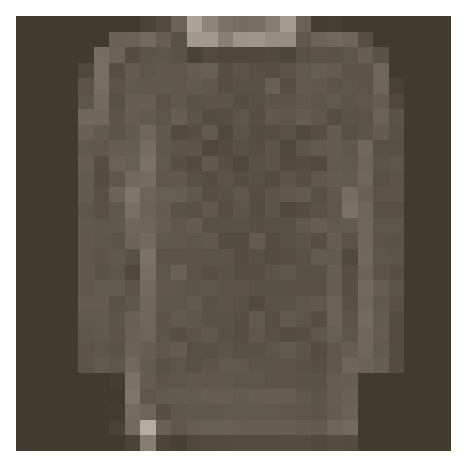

In [10]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);


With the data loaded, it's time to import the necessary packages.

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn as neural_network
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

print(f"Numpy version: {np.__version__}")
helper.__file__

Numpy version: 1.12.1


'/home/workspace/DL_PyTorch/helper.py'

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [12]:
# TODO: Define your network architecture here
class NeuralNetwork(neural_network.Module):
    def __init__(self):
        super().__init__()
        
        img_dimentions = 28 * 28
        n_classes = 10
        n_units = 128
        
        self.input_func = neural_network.Linear(img_dimentions, n_units)
        # Hidden Layer
        self.hidden = neural_network.Linear(n_units, (n_units // 2))
        self.output_func = neural_network.Linear((n_units // 2), n_classes)
        
    def forward(self, x):
        """Forward pass through the network. returns"""
        x = self.input_func(x)
        # Activation
        x = F.relu(x)
        x = self.hidden(x)
        # Activation
        x = F.relu(x)
        x = self.output_func(x)
        x = F.softmax(x, dim=1)
        
        return x

model = NeuralNetwork()
model

NeuralNetwork(
  (input_func): Linear(in_features=784, out_features=128, bias=True)
  (hidden): Linear(in_features=128, out_features=64, bias=True)
  (output_func): Linear(in_features=64, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [21]:
# Implement a stochastic gradient descent with a learning rate.
learning_rate = 0.00001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = neural_network.CrossEntropyLoss()

epochs = 10
print_every = 500
steps = 0

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flaten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)

        # Clear the gradients, as gradients accumulate so we need to ensure that there are no outliers.
        optimizer.zero_grad()

        # Make a forward pass through the network to get the logits 
        output = model.forward(images)

        # Use the logits to calculate the actual loss
        loss = criterion(output, labels) # What does this do?
        
        # Perform a backward pass through the network with `loss.backward()` to calculate the gradients
        loss.backward()
        
        # Take a step with the optimizer to update the weights      
        optimizer.step() # Performs a single optimization step.
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f"Epoch: {epoch + 1} / {epochs}\n"
                  f"Loss: {running_loss / print_every}\n"
                  "===================================")
            running_loss = 0
        

Epoch: 1 / 10
Loss: 1.7257845199108124
Epoch: 2 / 10
Loss: 0.2141893515586853
Epoch: 2 / 10
Loss: 1.7297572121620177
Epoch: 3 / 10
Loss: 0.4289261553287506
Epoch: 3 / 10
Loss: 1.7270342059135437
Epoch: 4 / 10
Loss: 0.642313747882843
Epoch: 4 / 10
Loss: 1.72790967297554
Epoch: 5 / 10
Loss: 0.8577333931922912
Epoch: 5 / 10
Loss: 1.7261817710399627
Epoch: 6 / 10
Loss: 1.0718179593086243
Epoch: 6 / 10
Loss: 1.7289445798397065
Epoch: 7 / 10
Loss: 1.2852044572830201
Epoch: 7 / 10
Loss: 1.7291297807693482
Epoch: 8 / 10
Loss: 1.5003753147125245
Epoch: 8 / 10
Loss: 1.7283033211231231
Epoch: 9 / 10
Loss: 1.7154060299396514
Epoch: 10 / 10
Loss: 0.20011412024497985
Epoch: 10 / 10
Loss: 1.7276363093852998


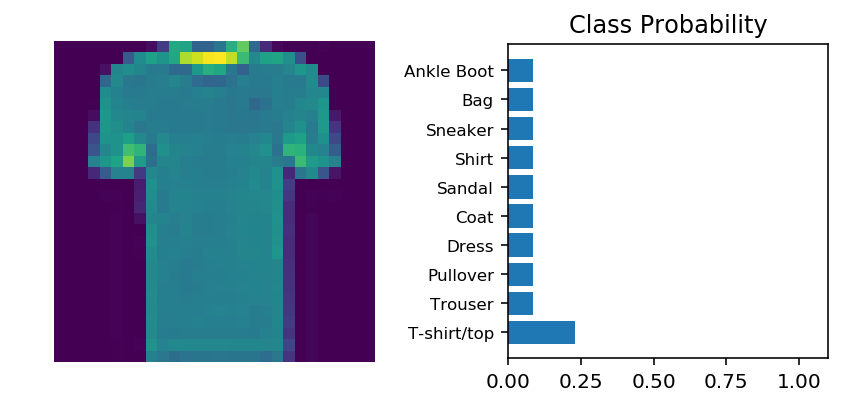

In [34]:
# Test out your network!

images, labels = next(iter(testloader))
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)
    
output = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), output, version='Fashion')

In [ ]:
output = F.softmax

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.